<a href="https://colab.research.google.com/github/GustavoMiec/POS_IA_evas-o-escolar/blob/main/evasaoescolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
#tabela
url = "https://raw.githubusercontent.com/pnferreira/fiap-ia-devs/main/dropout-inaugural.csv"
df = pd.read_csv(url)

In [13]:
# Visualizar as primeiras linhas da base de dados
display(df.head())

# Visualizar as informações da base de dados
display(df.info())

# Ver os valores únicos da coluna Target
display(df['Target'].value_counts())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8,5,2.0,1,1,1,13.0,10.0,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,6,1,11.0,1,1,1,1.0,3.0,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,5.0,1,1,1,22.0,27.0,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,8,2,15.0,1,1,1,23.0,27.0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,12,1,3.0,0,1,1,22.0,28.0,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   float64
 1   Application mode                                3635 non-null   int64  
 2   Application order                               3635 non-null   int64  
 3   Course                                          3629 non-null   float64
 4   Daytime/evening attendance                      3635 non-null   int64  
 5   Previous qualification                          3635 non-null   int64  
 6   Nacionality                                     3635 non-null   int64  
 7   Mother's qualification                          3632 non-null   float64
 8   Father's qualification                          3628 non-null   float64
 9   Mother's occupation                      

None

,count
Target,
Graduate,2212
Dropout,1423


In [14]:
# Tratar dados nulos
df.dropna(inplace=True)

# Tratar dados duplicados
df.drop_duplicates(inplace=True)

y = df['Target']
df = pd.get_dummies(df, drop_first=True)

In [15]:
columns_to_drop = [col for col in df.columns if col != 'Target']

scaler = StandardScaler()
X = df.drop(columns= [col for col in ['Target'] if col in df.columns], errors='ignore')
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.9, random_state=42, stratify=y)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate'])
conf_matrix = confusion_matrix(y_test, y_pred)

Acurácia: 1.00
Acurácia: 100.00%
              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1279
    Graduate       1.00      1.00      1.00      1970

    accuracy                           1.00      3249
   macro avg       1.00      1.00      1.00      3249
weighted avg       1.00      1.00      1.00      3249



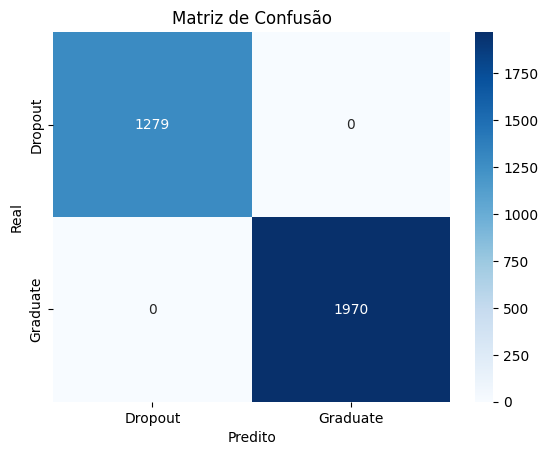

       Real  Previsto
0   Dropout   Dropout
1  Graduate  Graduate
2   Dropout   Dropout
3  Graduate  Graduate
4  Graduate  Graduate
5  Graduate  Graduate
6  Graduate  Graduate
7  Graduate  Graduate
8  Graduate  Graduate
9  Graduate  Graduate
Correto
True    3249
Name: count, dtype: int64
Target
Graduate    219
Dropout     142
Name: count, dtype: int64
Target
Graduate    1970
Dropout     1279
Name: count, dtype: int64


In [26]:
# Exibir métricas
print(f'Acurácia: {accuracy:.2f}')
print(f'Acurácia: {accuracy * 100:.2f}%')
print(report)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate'], yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()






In [27]:
# Criar um DataFrame para comparar previsões e valores reais
comparison_df = pd.DataFrame({'Real': y_test.values, 'Previsto': y_pred})

# Exibir as primeiras 10 previsões
print(comparison_df.head(10))


# Contar previsões corretas e incorretas
comparison_df['Correto'] = comparison_df['Real'] == comparison_df['Previsto']
print(comparison_df['Correto'].value_counts())  # Mostra quantas foram certas e erradas


print(y_train.value_counts())
print(y_test.value_counts())

y_train_pred = model.predict(X_train)
print(f'Acurácia no treino: {accuracy_score(y_train, y_train_pred):.2f}')

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Média da Acurácia (Cross-Validation): {cv_scores.mean():.2f}')


print(conf_matrix)



       Real  Previsto
0   Dropout   Dropout
1  Graduate  Graduate
2   Dropout   Dropout
3  Graduate  Graduate
4  Graduate  Graduate
5  Graduate  Graduate
6  Graduate  Graduate
7  Graduate  Graduate
8  Graduate  Graduate
9  Graduate  Graduate
Correto
True    3249
Name: count, dtype: int64
Target
Graduate    219
Dropout     142
Name: count, dtype: int64
Target
Graduate    1970
Dropout     1279
Name: count, dtype: int64
Acurácia no treino: 1.00
Média da Acurácia (Cross-Validation): 1.00
[[1279    0]
 [   0 1970]]


In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

Acurácia: 1.00
Acurácia: 100.00%
              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1279
    Graduate       1.00      1.00      1.00      1970

    accuracy                           1.00      3249
   macro avg       1.00      1.00      1.00      3249
weighted avg       1.00      1.00      1.00      3249



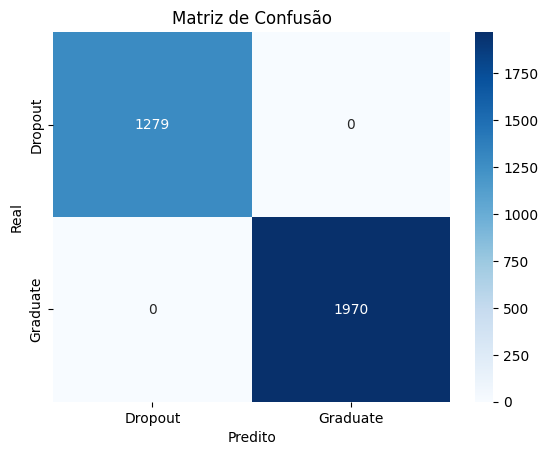

In [30]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate'])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Acurácia: {accuracy * 100:.2f}%')
print(report)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate'], yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f'Média da Acurácia (Cross-Validation): {cv_scores.mean():.2f}')


Média da Acurácia (Cross-Validation): 1.00
